In [47]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#노트북 안에 그래프를 그리기 위해
%matplotlib inline

#그래프에서 격자로 숫자범위가 눈에 잘 띄도록 ggplot 스타일 이용
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 깨지는 문제 대처
#mpl.rcParams['axes,unicode_minus']=False


In [48]:
#read data    https://han-py.tistory.com/312
train=pd.read_csv("C:/Users/imtjr/Desktop/open/train.csv",parse_dates=["date"])
train.shape

(1095, 13)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1095 non-null   datetime64[ns]
 1   precipitation  417 non-null    float64       
 2   temp_mean      1095 non-null   float64       
 3   temp_highest   1095 non-null   float64       
 4   temp_lowest    1095 non-null   float64       
 5   PM10           1028 non-null   float64       
 6   PM2.5          1027 non-null   float64       
 7   humidity       1095 non-null   float64       
 8   sunshine_sum   1090 non-null   float64       
 9   sunshine_rate  1095 non-null   float64       
 10  wind_mean      1095 non-null   float64       
 11  wind_max       1095 non-null   float64       
 12  rental         1095 non-null   int64         
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 111.3 KB


In [50]:
#how to controll null data 
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705


In [84]:
train.temp_mean.describe()

count    1095.000000
mean       13.279726
std        10.470287
min       -14.800000
25%         4.600000
50%        13.800000
75%        22.600000
max        33.700000
Name: temp_mean, dtype: float64

In [85]:
train.isnull().sum()

date             0
precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
year             0
month            0
day              0
dayofweek        0
year_month       0
dtype: int64

In [79]:
#train=train.replace(np.nan,0)
#https://datatofish.com/replace-nan-values-with-zeros/

<AxesSubplot:>

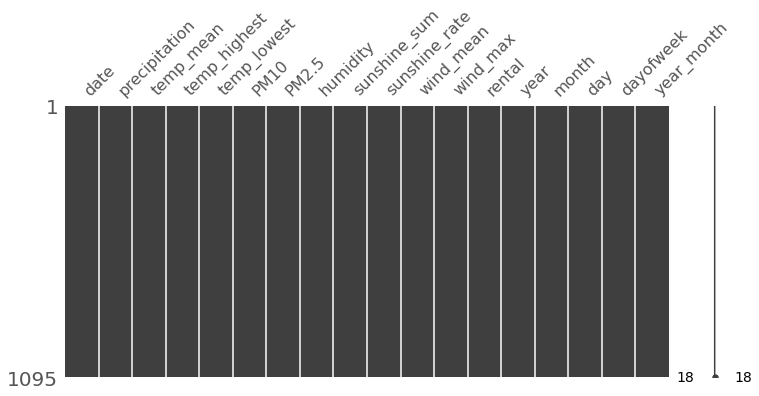

In [80]:
#visualization  
import missingno as msno

msno.matrix(train,figsize=(12,5))

In [81]:
train["year"]=train["date"].dt.year
train["month"]=train["date"].dt.month
train["day"]=train["date"].dt.day




train.shape


(1095, 18)

[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'D')]

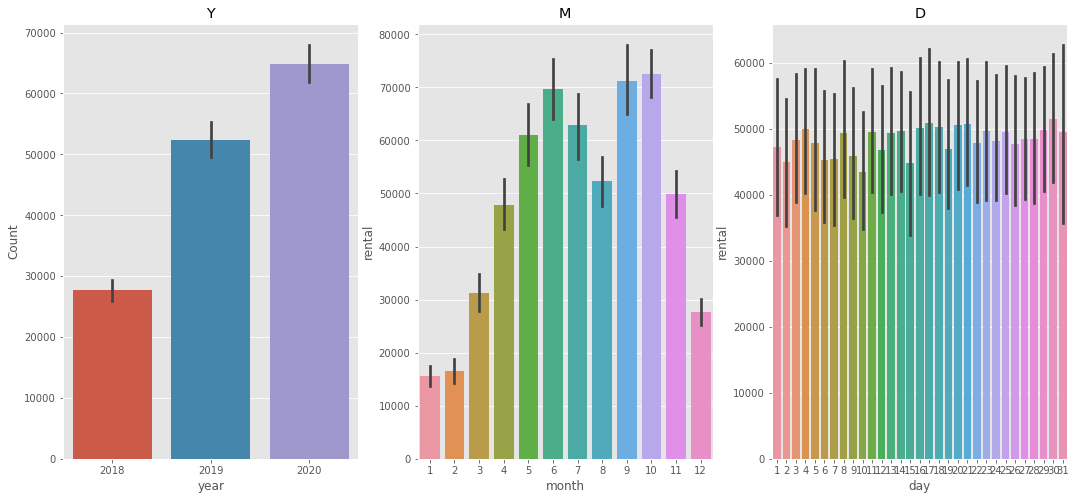

In [82]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="rental", ax=ax1)
sns.barplot(data=train, x="month", y="rental", ax=ax2)
sns.barplot(data=train, x="day", y="rental", ax=ax3)


ax1.set(ylabel="Count",title="Y")
ax2.set(xlabel="month",title="M")
ax3.set(xlabel="day",title="D")



In [83]:
#날씨도 판단해보면 좋을지도? 아니어도 상관 없을 것같기도

train["dayofweek"]=train["date"].dt.dayofweek
train.shape

(1095, 18)

In [58]:
train["dayofweek"].value_counts()

0    157
1    157
2    157
3    157
4    156
6    156
5    155
Name: dayofweek, dtype: int64

In [1]:
corrMatt=train[["date", "precipitation", "temp_mean", "temp_highest", "temp_lowest", "PM10", "PM2.5", "humidity", "sunshine_sum","sunshine_rate","wind_mean", "wind_max", "rental"
]]
corrMatt=corrMatt.corr()
print(corrMatt)

mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

NameError: name 'train' is not defined

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,square=True,annot=True)


<AxesSubplot:xlabel='precipitation', ylabel='rental'>

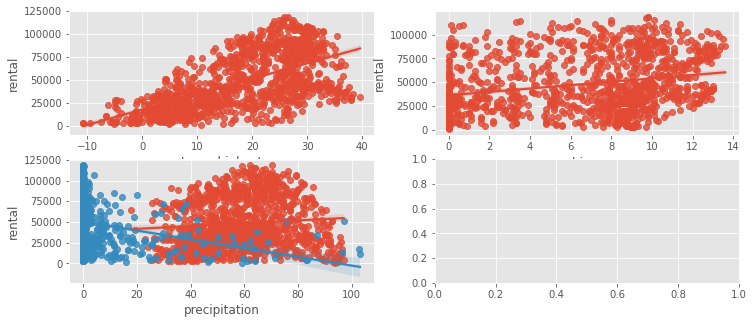

In [61]:
fig,[[ax1,ax2],[ax3,ax4]]=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,5)
sns.regplot(x="temp_highest",y="rental",data=train,ax=ax1)
sns.regplot(x="sunshine_sum",y="rental",data=train,ax=ax2)
sns.regplot(x="humidity",y="rental",data=train,ax=ax3)
sns.regplot(x="precipitation",y="rental",data=train,ax=ax3)
#feature engineering

In [62]:
def concatenate_year_month(date):
    return "{0}-{1}-{2}".format(date.year,date.month,date.day)
train["year_month"]=train["date"].apply(concatenate_year_month)

print(train.shape)
train[["date","year_month"]].head()

type(train['year'])

(1095, 18)


pandas.core.series.Series

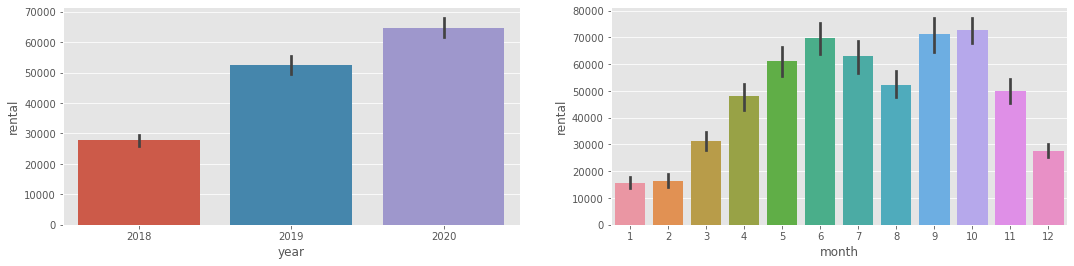

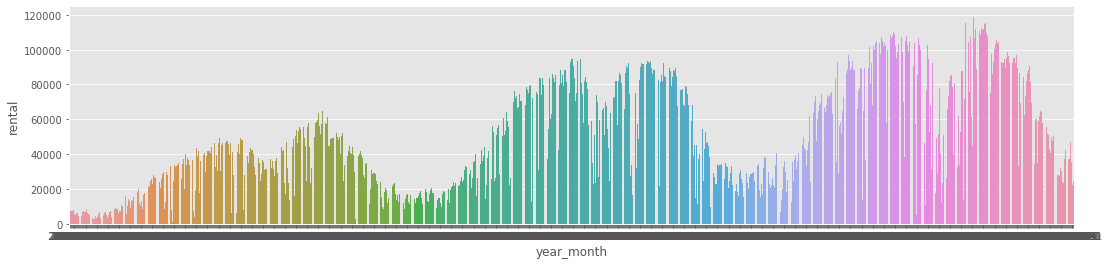

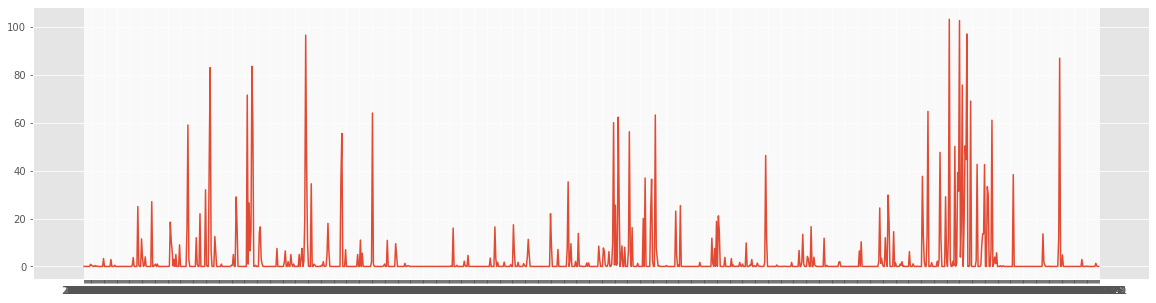

In [73]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train,x="year",y="rental",ax=ax1)
sns.barplot(data=train,x="month",y="rental",ax=ax2)

fig,ax3=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train,x="year_month",y="rental",ax=ax3)

fig,ax4=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(20,5)

ax4.plot(train['year_month'],train['precipitation'])






In [ ]:
# trainWithoutOutliers
trainWithOutliers=train[np.abs(train["rental"]-train["rental"].mean())<=(3*train["rental"].std())]

print(train.shape)
print(trainWithOutliers.shape)

In [ ]:
# rental값의 데이터 분포도를 파악

figure,axes=plt.subplots(ncols=2,nrows=2)
figure.set_size_inches(12,10)

sns.distplot(train["rental"],ax=axes[0][0])
stats.probplot(train["rental"],dist='norm',fit=True,plot=axes[0][1])
sns.distplot(np.log(train["rental"]),ax=axes[1][0])
stats.probplot(np.log1p(train["rental"]),dist='norm',fit=True,plot=axes[1][1])